In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('Dataset/uber.csv')  # <-- Update path as needed
print("Original Shape:", df.shape)
df.head()

Original Shape: (200000, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [31]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'] , errors = 'coerce',utc = True)
df['hour'] = df['pickup_datetime'].dt.hour
df['dow'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year



In [32]:
df.dropna(inplace=True)
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]
df = df.drop(['key', 'pickup_datetime'] ,axis = 1)

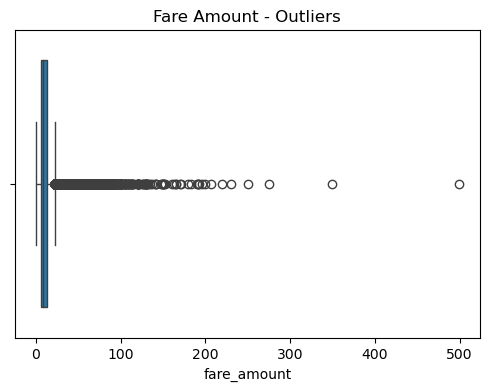

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount - Outliers')
plt.show()

In [34]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['fare_amount'] >= Q1 - 1.5 * IQR) & (df['fare_amount'] <= Q3 + 1.5 * IQR)]

print("After Outlier Removal:", df.shape)

After Outlier Removal: (182148, 11)


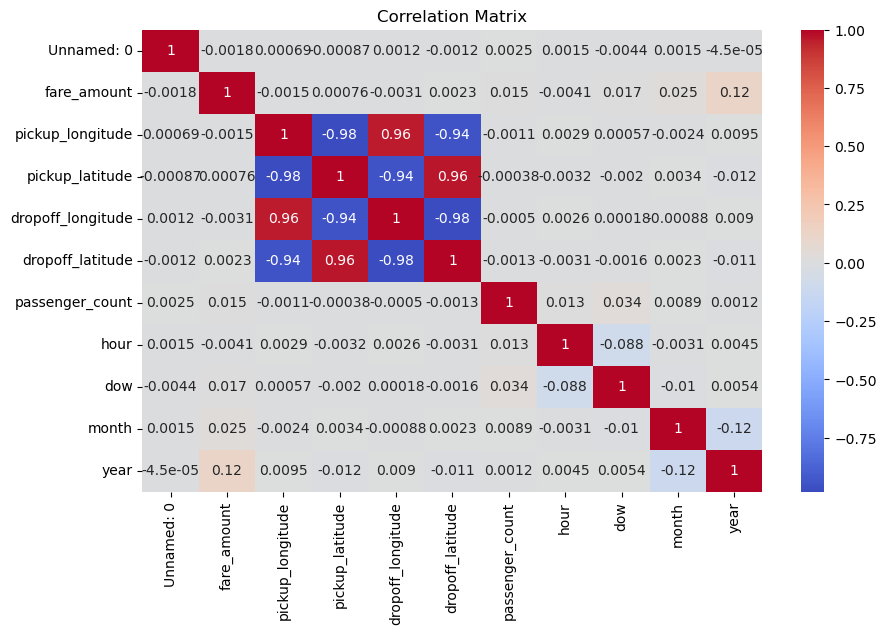

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x = df.drop('fare_amount',axis = 1)
y = df['fare_amount']

x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test , y_pred)
lr_rsme = np.sqrt(mean_squared_error(y_test,y_pred))

In [19]:
print(f"Linear Regression : R2 : {lr_r2 : .3f} | RSME : {lr_rsme : .3f}")

Linear Regression : R2 :  0.022 | RSME :  4.084


In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest ➜ R²: {rf_r2:.3f} | RMSE: {rf_rmse:.3f}")

Random Forest ➜ R²: 0.757 | RMSE: 2.037


In [24]:
# 📊 Cell 10: Model Comparison Summary
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rsme, rf_rmse],
    "R² Score": [lr_r2, rf_r2]
})
print(comparison)

               Model      RMSE  R² Score
0  Linear Regression  4.083861  0.021985
1      Random Forest  2.037243  0.756618
